In [7]:
%pip install networkx 2.8
%pip install scikit-fuzzy
%pip install matplotlib

print("teste")

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement 2.8 (from versions: none)
ERROR: No matching distribution found for 2.8


Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 7.2/7.2 MB 10.3 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 4.9 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
teste


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


c:\Users\breno.sousa\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


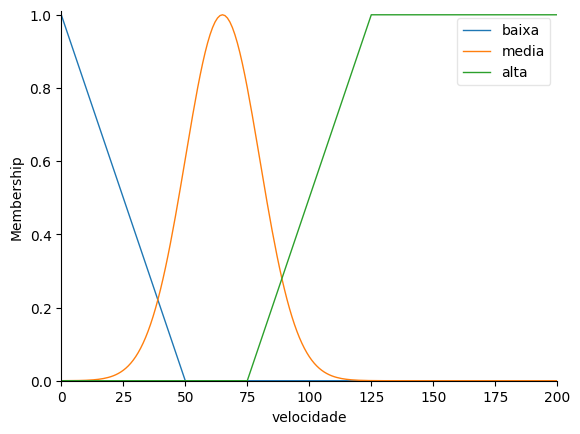

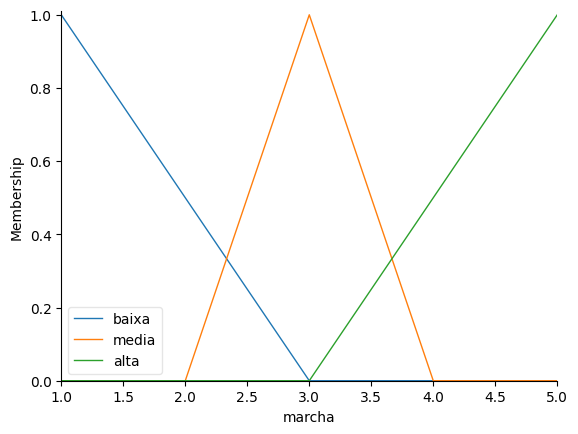

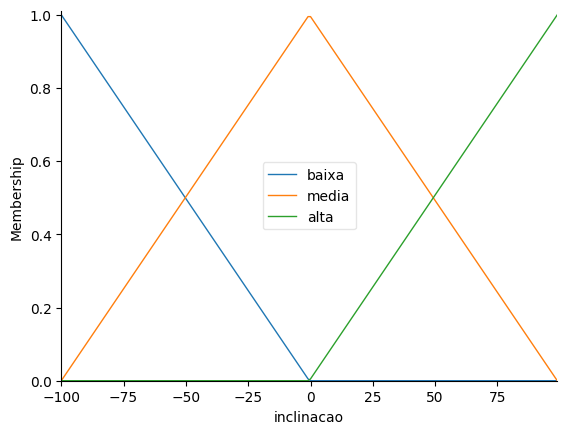

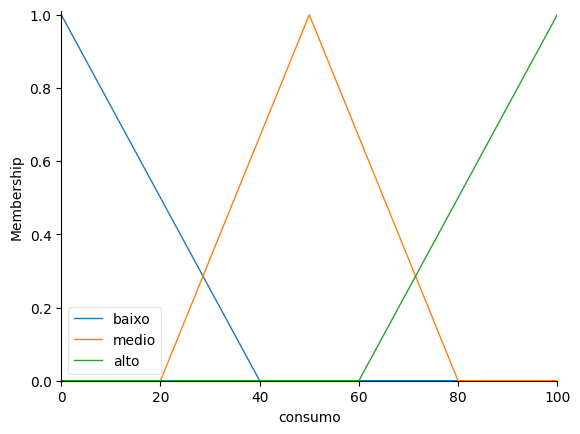

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
velocidade = ctrl.Antecedent(np.arange(0, 201, 1), 'velocidade')
marcha = ctrl.Antecedent(np.arange(1, 6, 1), 'marcha')
inclinacao = ctrl.Antecedent(np.arange(-100, 100, 1), 'inclinacao')
consumo = ctrl.Consequent(np.arange(0, 101, 1), 'consumo')

# Velocidade
velocidade['baixa'] = fuzz.trimf(velocidade.universe, [0, 0, 50])
velocidade['media'] = fuzz.gaussmf(velocidade.universe, 65, 15)
velocidade['alta'] = fuzz.trapmf(velocidade.universe, [75, 125, 200, 200])

# Marcha
marcha['baixa'] = fuzz.trimf(marcha.universe, [1, 1, 3])
marcha['media'] = fuzz.trimf(marcha.universe, [2, 3, 4])
marcha['alta'] = fuzz.trimf(marcha.universe, [3, 5, 5])

# Inclinação
inclinacao.automf(names=['baixa', 'media', 'alta'])

# Consumo
consumo['baixo'] = fuzz.trimf(consumo.universe, [0, 0, 40])
consumo['medio'] = fuzz.trimf(consumo.universe, [20, 50, 80])
consumo['alto'] = fuzz.trimf(consumo.universe, [60, 100, 100])

velocidade.view()
marcha.view()
inclinacao.view()
consumo.view()

In [9]:
rule1 = ctrl.Rule(inclinacao['baixa'], consumo['baixo'])
rule2 = ctrl.Rule(velocidade['media'] & marcha['media'] & inclinacao['media'], consumo['medio'])
rule3 = ctrl.Rule(((velocidade['media'] | velocidade['alta']) & inclinacao['alta']) |
                  ((velocidade['media'] | velocidade['alta']) & marcha['baixa']) , consumo['alto'])

In [10]:
consumo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
consumo_simulador = ctrl.ControlSystemSimulation(consumo_ctrl)

# Entrando com alguns valores
consumo_simulador.input['velocidade'] = 100
consumo_simulador.input['marcha'] = 5
consumo_simulador.input['inclinacao'] = 100

# Computando o resultado
consumo_simulador.compute()
print(consumo_simulador.output['consumo'],'%')


84.44444444444444 %


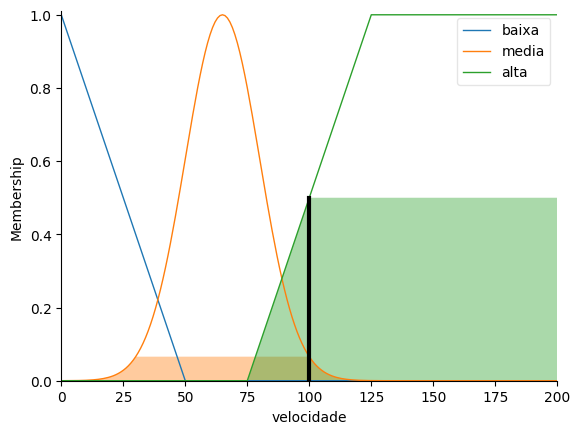

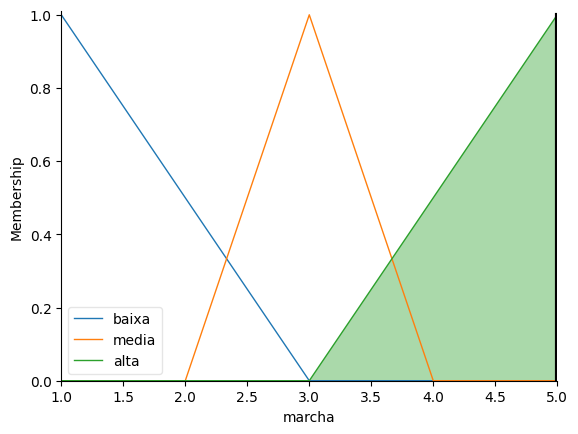

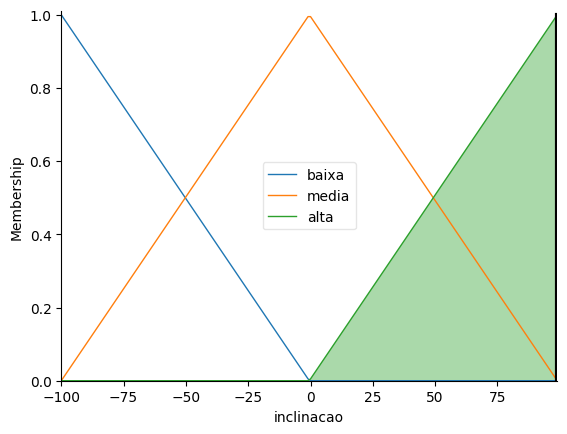

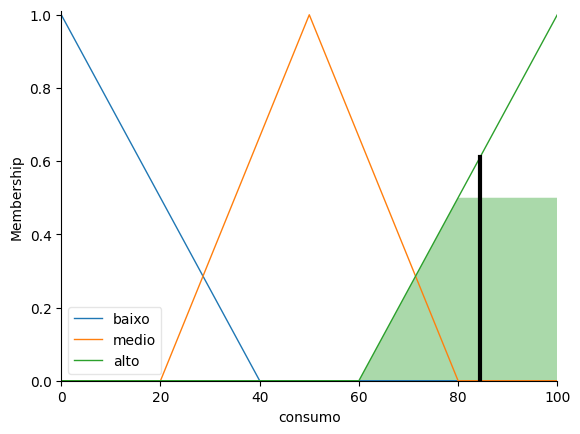

In [11]:
velocidade.view(sim=consumo_simulador)
marcha.view(sim=consumo_simulador)
inclinacao.view(sim=consumo_simulador)
consumo.view(sim=consumo_simulador)